In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples
import os
os.chdir('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\KAGGLE DATASETS')

In [11]:
df=pd.read_csv('Country-data.csv')
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,167,167,Mauritius,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_mort,167.0,NaN,NaN,NaN,38.27006,40.328931,2.6,8.25,19.3,62.1,208.0
exports,167.0,NaN,NaN,NaN,41.108976,27.41201,0.109,23.8,35.0,51.35,200.0
health,167.0,NaN,NaN,NaN,6.815689,2.746837,1.81,4.92,6.32,8.6,17.9
imports,167.0,NaN,NaN,NaN,46.890215,24.209589,0.0659,30.2,43.3,58.75,174.0
income,167.0,NaN,NaN,NaN,17144.688623,19278.067698,609.0,3355.0,9960.0,22800.0,125000.0
inflation,167.0,NaN,NaN,NaN,7.781832,10.570704,-4.21,1.81,5.39,10.75,104.0
life_expec,167.0,NaN,NaN,NaN,70.555689,8.893172,32.1,65.3,73.1,76.8,82.8
total_fer,167.0,NaN,NaN,NaN,2.947964,1.513848,1.15,1.795,2.41,3.88,7.49
gdpp,167.0,NaN,NaN,NaN,12964.155689,18328.704809,231.0,1330.0,4660.0,14050.0,105000.0


In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
df=df.set_index('country')
df.tail(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35000
United Kingdom,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900
United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400
Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [13]:
dfsc=StandardScaler().fit_transform(df)
dfsc

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [14]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',random_state=121)
    kmeans.fit(dfsc)
    wcss.append(kmeans.inertia_)
print(wcss)

C:\Users\soume\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1503.0000000000002, 1050.2145582853307, 831.424435208687, 700.7057359845705, 639.7071673518852, 579.518921063345, 509.0763784976059, 462.5991819043713, 440.7653538634047, 394.8961502867703]


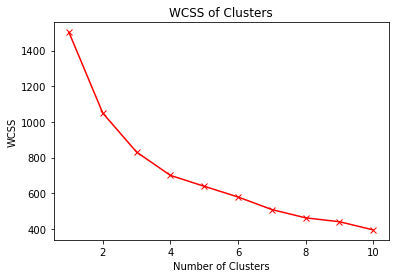

In [15]:
plt.plot(range(1,11),wcss,'rx-')
plt.title('WCSS of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
kmeans=KMeans(n_clusters=3)
clusters=kmeans.fit_predict(dfsc)
clusters

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [71]:
cluster_list=list(clusters)

In [72]:
df['cluster']=cluster_list
df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2


In [21]:
sil_score=silhouette_score(dfsc,clusters)
sil_score

0.28329575683463126

In [22]:
sample_sil=silhouette_samples(dfsc,clusters)
sample_sil

array([ 0.42365422,  0.53065531,  0.41803206,  0.31991876,  0.43383625,
        0.35483992,  0.50078704,  0.25503118,  0.35021837,  0.38586768,
        0.18867089, -0.18181368,  0.28339098,  0.36918173,  0.46980271,
        0.26500644,  0.47896559,  0.36242395,  0.42974498,  0.33202277,
        0.30392365, -0.08620519,  0.33707587,  0.09127455,  0.4732842 ,
        0.45072557,  0.33778816,  0.31265347,  0.39479032,  0.31442187,
        0.44128824,  0.38128751,  0.42467009,  0.35839794,  0.49491904,
        0.42669157,  0.22917177,  0.40528266,  0.09377443,  0.27487082,
        0.39290205,  0.34962824, -0.04447167, -0.13437676,  0.36156531,
        0.46380254,  0.46812962,  0.3359854 ,  0.52222787,  0.14539918,
        0.1547674 ,  0.27991977,  0.38562392,  0.29351207,  0.25856292,
        0.02663844,  0.31094905,  0.43763125,  0.31422178,  0.22042106,
        0.05020904,  0.50585854,  0.34747266,  0.42577269,  0.39680291,
        0.32421495,  0.26745919,  0.22233967,  0.26937569,  0.18

In [25]:
cluster_grp=df.groupby(df['cluster'])

In [27]:
for i,j in cluster_grp:
    print(i)
    print(j)

0
                          child_mort  exports  health  imports  income  \
country                                                                  
Afghanistan                     90.2    10.00    7.58     44.9    1610   
Angola                         119.0    62.30    2.85     42.9    5900   
Benin                          111.0    23.80    4.10     37.2    1820   
Botswana                        52.5    43.60    8.30     51.3   13300   
Burkina Faso                   116.0    19.20    6.74     29.6    1430   
Burundi                         93.6     8.92   11.60     39.2     764   
Cameroon                       108.0    22.20    5.13     27.0    2660   
Central African Republic       149.0    11.80    3.98     26.5     888   
Chad                           150.0    36.80    4.53     43.5    1930   
Comoros                         88.2    16.50    4.51     51.7    1410   
Congo, Dem. Rep.               116.0    41.10    7.91     49.6     609   
Congo, Rep.                     63.9

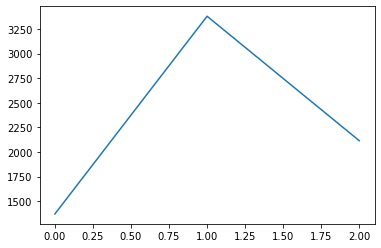

In [48]:
plt.plot(cluster_grp['exports'].sum())

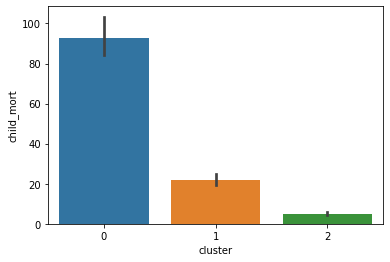

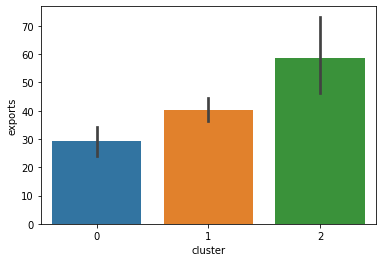

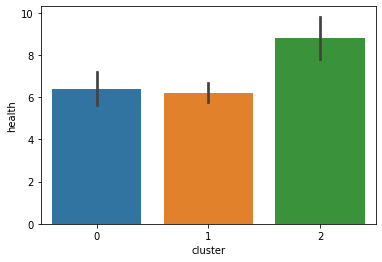

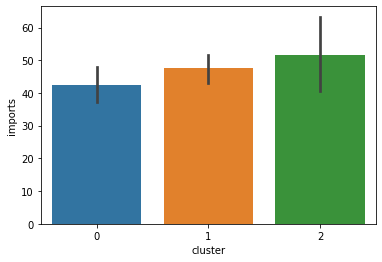

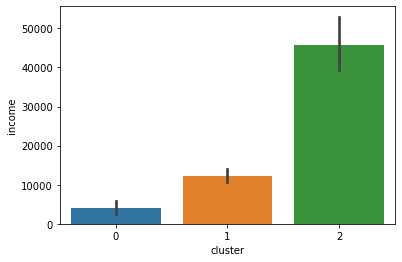

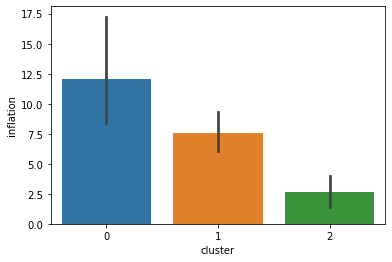

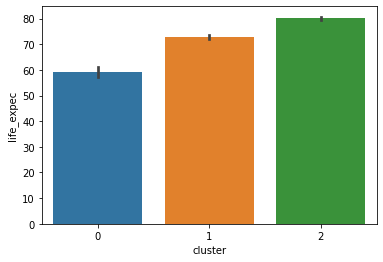

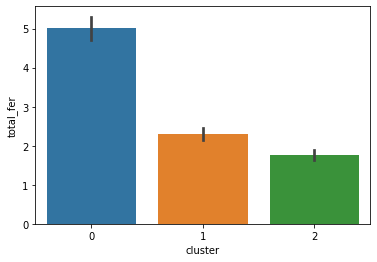

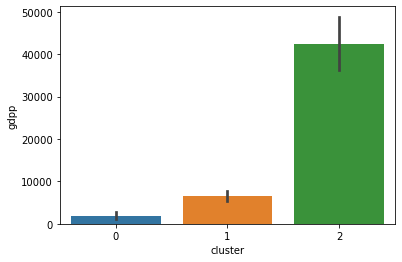

In [55]:
for i in df.columns:
    if i!='cluster':
        sns.barplot(x='cluster',y=i,data=df)
        plt.show()

Highest in Child Mortality - Cluster 0
Lowest in Exports Per Capita - Cluster 0
Lowest in Health Spending Per Capita - Cluster 1
Lowest in Imports Per Capita - Cluster 0
Lowest in Net Income Per Capita - Cluster 0
Highest in Inflation - Cluster 0
Lowest in Life Expectancy - Cluster 0
Highest in No. of Births for present fertility rate - Cluster 0
Lowest in GDP per capita - Cluster 0

# From the above statistics, we can conclude that the CEO of HELP International needs to focus more on the countries coming under cluster 0.

In [63]:
cluster_0_countries=list(df.index[df.cluster==0])

In [64]:
cluster_0_countries

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [65]:
len(cluster_0_countries)

47

In [74]:
mean=[]
for i in range(0,3):
    mean.append(sample_sil[i==clusters].mean())
print(mean)

[0.36300434167151263, 0.2413339283715689, 0.15209255715312836]


In [75]:
from yellowbrick.cluster import SilhouetteVisualizer

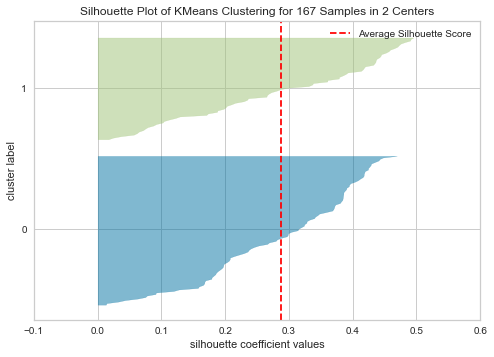

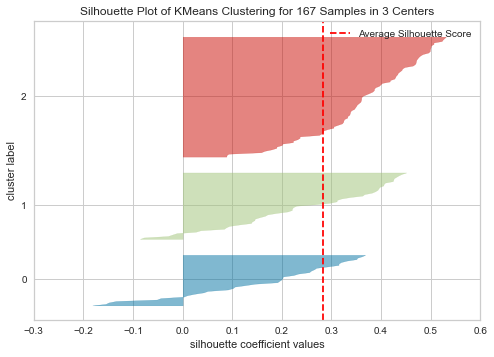

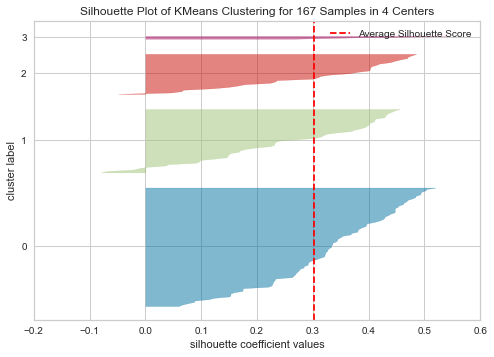

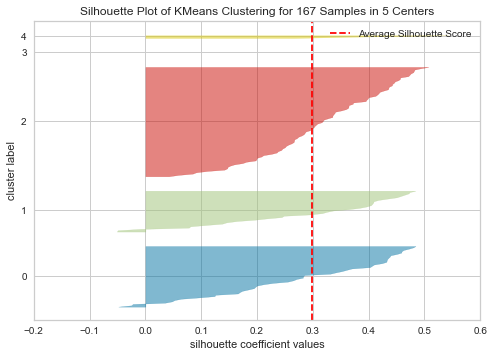

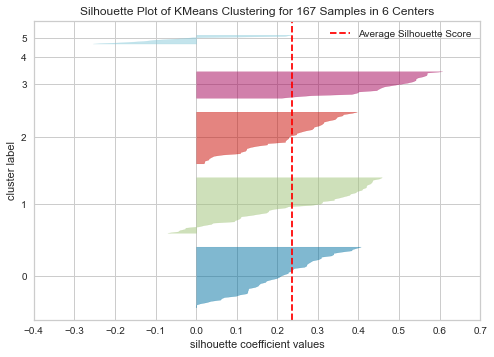

In [90]:
for i in range(2,7):
    model=KMeans(n_clusters=i,random_state=42)
    visualizer=SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(dfsc)
    visualizer.show()